# Mini Project: Deep Learning with Keras

In this mini-project we'll be building a deep learning classifier using Keras to predict income from the popular [Adult Income dataset](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).

Predicting income from demographic and socio-economic information is an important task with real-world applications, such as financial planning, market research, and social policy analysis. The Adult dataset, sometimes referred to as the "Census Income" dataset, contains a vast amount of anonymized data on individuals, including features such as age, education, marital status, occupation, and more. Our objective is to leverage this data to train a deep learning model that can effectively predict whether an individual's income exceeds $50,000 annually or not.

Throughout this Colab, we will walk you through the entire process of building a deep learning classifier using Keras, a high-level neural network API that runs on top of TensorFlow. Keras is known for its user-friendly and intuitive interface, making it an excellent choice for both beginners and experienced deep learning practitioners.

Here's a brief outline of what we will cover in this mini-project:

1. **Data Preprocessing:** We will start by loading and exploring the Adult dataset.

2. **Building the Deep Learning Model:** We will construct a neural network using Keras, where we'll dive into understanding the key components of a neural network, including layers, activation functions, and optimization algorithms.

3. **Model Training:** With our model architecture in place, we will split the data into training and validation sets and train the neural network on the training data. We will monitor the training process to prevent overfitting and enhance generalization.

4. **Model Evaluation:** After training, we'll assess the performance of our model on the test dataset.

By the end of this tutorial, you will not only have a functional deep learning classifier for income prediction but also gain valuable insights into how to leverage the power of neural networks for solving real-world classification tasks.


In [7]:
%pip install requirements.txt

%pip install scikeras

ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
HINT: You are attempting to install a package literally named "requirements.txt" (which cannot exist). Consider using the '-r' flag to install the packages listed in requirements.txt
ERROR: No matching distribution found for requirements.txt
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

You can download the Adult data from the link [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data).

Here are your tasks:

  1. Load the Adult data into a Pandas Dataframe.
  2. Ensure the dataset has properly named columns. If the columns are not read in, assign them by referencing the dataset documentation.
  3. Display the first five rows of the dataset.

In [9]:

# Define column names from UCI documentation
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

# Dataset URL
DATA_PATH = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Load dataset
df = pd.read_csv(
    DATA_PATH, 
    header=None, 
    names=columns, 
    na_values=" ?", 
    skipinitialspace=True
)

print("Shape of dataset:", df.shape)


Shape of dataset: (32561, 15)


In [10]:
# Display the first few rows of the DataFrame
print(df.head())


   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

If you're not already familiar with the Adult dataset, it's important to do some exploratory data analysis.

Here are your tasks:

  1. Do exploratory data analysis to give you some better intuition for the dataset. This is a bit open-ended. How many rows/columns are there? How are NULL values represented? What's the percentage of positive cases in the dataset?

  2. Drop all rows with NULL values.

  3. Use Scikit-Learn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to convert the `income` column with a data type string to a binary variable.

In [11]:
# Do some exploratory analysis. How many rows/columns are there? How are NULL
# values represented? What's the percentrage of positive cases in the dataset?
# Shape of dataset

print("Shape:", df.shape)

# Check missing values (pandas already read " ?" as NaN because we set na_values=" ?")
print("\nMissing values per column:\n", df.isnull().sum())

# Percentage of positive cases (>50K income)
positive_cases = (df['income'] == '>50K').mean() * 100
print(f"\nPercentage of positive cases (>50K): {positive_cases:.2f}%")


Shape: (32561, 15)

Missing values per column:
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Percentage of positive cases (>50K): 24.08%


In [12]:
# Find all NULL values and drop them
# Quick look at data types and non-null counts
print("\nInfo:\n")
print(df.info())
# Drop rows with missing values
df = df.dropna()

print("New shape after dropping NULLs:", df.shape)


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
New shape after dropping NULLs: (32561, 15)


In [13]:
# Use Scikit-Learn's LabelEncoder to convert the income column with a data type
# string to a binary variable.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

print(df['income'].value_counts(normalize=True) * 100)  # percentages


0    75.919044
1    24.080956
Name: income, dtype: float64


1. Split the data into training and test sets. Remember not to include the label you're trying to predict, `income`, as a column in your training data.

In [14]:
# Split dataset into training and test sets
# Split into train (80%) and test (20%)

# Define features (drop target column)
X = df.drop(columns=['income'])

# Define target
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # keep class balance
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Target distribution in train:", y_train.mean())
print("Target distribution in test:", y_test.mean())


Training set size: (26048, 14)
Test set size: (6513, 14)
Target distribution in train: 0.24082463144963145
Target distribution in test: 0.24074927068939045


In machine learning, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric are commonly used to evaluate the performance of binary classification models. These are valuable tools for understanding how well a model can distinguish between the positive and negative classes in a classification problem.

Let's break down each concept:

1. ROC Curve:
The ROC curve is a graphical representation of a binary classifier's performance as the discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold values. Here's how these rates are calculated:

- True Positive Rate (TPR), also called Sensitivity or Recall, measures the proportion of actual positive instances that are correctly identified by the model:
   TPR = True Positives / (True Positives + False Negatives)

- False Positive Rate (FPR) measures the proportion of actual negative instances that are incorrectly classified as positive by the model:
   FPR = False Positives / (False Positives + True Negatives)

The ROC curve is useful because it shows how well a classifier can trade off between sensitivity and specificity across different threshold values. The ideal ROC curve hugs the top-left corner, indicating a high TPR and low FPR, meaning the classifier is excellent at distinguishing between the two classes.

2. AUC (Area Under the Curve):
The AUC is a scalar metric derived from the ROC curve. It represents the area under the ROC curve, hence its name. The AUC ranges from 0 to 1, where 0 indicates a very poor classifier (always predicting the opposite class) and 1 signifies a perfect classifier (making all correct predictions).

The AUC metric is beneficial because it provides a single value to summarize the classifier's overall performance across all possible threshold values. It is particularly useful when dealing with imbalanced datasets, where one class significantly outnumbers the other. In such cases, accuracy alone might not be a reliable evaluation metric, and AUC can provide a more robust performance measure.

A quick rule of thumb for interpreting AUC values:
- AUC ≈ 0.5: The model performs no better than random guessing.
- 0.5 < AUC < 0.7: The model has poor to fair performance.
- 0.7 < AUC < 0.9: The model has good to excellent performance.
- AUC ≈ 1: The model is close to or has a perfect performance.

Here are your tasks:

  1. Use Scikit-Learn's [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) to calculate the AUC score for a method that always predicts the majority class.  

In [15]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Use Scikit-Learn's roc_auc_score to calculate the AUC score for a method that
# always predicts the majority class.
# Majority class (0 = <=50K, 1 = >50K)

majority_class = y_train.mode()[0]
print("Majority class:", majority_class)


# Predict constant probabilities: all majority_class
y_dummy_pred = np.full_like(y_test, fill_value=majority_class)

# Since roc_auc_score expects probabilities for the positive class,
# we can just pass all zeros if majority_class = 0, or all ones if majority_class = 1
y_dummy_prob = np.full_like(y_test, fill_value=majority_class, dtype=float)

auc_score = roc_auc_score(y_test, y_dummy_prob)
print("ROC AUC Score (majority class predictor):", auc_score)

#Note:
#If the majority class is 0 (<=50K), then the dummy model predicts 0 for everyone → AUC score = 0.5.

#If the majority class were 1 (>50K), same logic → still 0.5.

#That’s because AUC measures ranking ability, and a model that always predicts one class has no ranking power → AUC = random guess baseline.



Majority class: 0
ROC AUC Score (majority class predictor): 0.5


Now, let's do a little feature engineering.

1. Use Scikit-Learn's [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) to apply One Hot Encoding to the categorical variables in `workclass`, `education`, `marital-status`, `occupation`, `relationship`, 'race', `sex`, and `native-country`. Also, apply [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the remaining continuous features. How many columns will the dataframe have after these columns transformations are applied?

In [16]:
# Use Scikit-Learn's ColumnTransformer to apply One Hot Encoding to the
# categorical variables in workclass, education, marital-status, occupation,
# relationship, 'race', sex, and native-country. #Also, apply MinMaxScaler to
# the remaining continuous features.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Categorical features
categorical_features = [
    "workclass", "education", "marital_status", "occupation",
    "relationship", "race", "sex", "native_country"
]

# Continuous features (everything else except target)
continuous_features = [col for col in X.columns if col not in categorical_features]
print("Continuous features:", continuous_features)


# Define transformers
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", MinMaxScaler(), continuous_features)
    ]
)


# Fit on training set and transform
X_train_transformed = preprocessor.fit_transform(X_train)

print("Transformed shape:", X_train_transformed.shape)



Continuous features: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Transformed shape: (26048, 108)


In [17]:
# How many columns will the dataframe have after these columns transformations are applied?

# Get number of new columns from OneHotEncoder
ohe = preprocessor.named_transformers_['cat']
n_ohe_features = len(ohe.get_feature_names_out(categorical_features))

# Total = one-hot encoded features + scaled continuous features
total_features = n_ohe_features + len(continuous_features)

print("Number of OHE features:", n_ohe_features)
print("Number of continuous features:", len(continuous_features))
print("Total number of transformed columns:", total_features)

#Output:
#categorical_features expand heavily because each category becomes its own column:

#workclass: 9 categories → 9 columns

#education: 16 categories → 16 columns

#marital_status: 7 categories → 7 columns

#occupation: 15 categories → 15 columns

#relationship: 6 categories → 6 columns

#race: 5 categories → 5 columns

#sex: 2 categories → 2 columns

#native_country: ~41 categories → 41 columns
# Total categorical = ~101 OHE columns

#continuous_features: 6 columns (age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week).


Number of OHE features: 102
Number of continuous features: 6
Total number of transformed columns: 108


Keras is an open-source deep learning library written in Python. It was developed to provide a user-friendly, high-level interface for building and training neural networks. The library was created by François Chollet and was first released in March 2015 as part of the Deeplearning4j project. Later, it became part of the TensorFlow ecosystem and is now the official high-level API for TensorFlow.

Keras is designed to be modular, user-friendly, and easy to extend. It allows researchers and developers to quickly prototype and experiment with various deep learning models. One of the primary goals of Keras is to enable fast experimentation, making it simple to build and iterate on different architectures.

Key features of Keras include:

1. User-friendly API: Keras provides a simple and intuitive interface for defining and training deep learning models. Its design philosophy focuses on ease of use and clarity of code.

2. Modularity: Models in Keras are built as a sequence of layers, and users can easily stack, merge, or create complex architectures using a wide range of predefined layers.

3. Extensibility: Keras allows users to define custom layers, loss functions, and metrics. This flexibility enables researchers to experiment with new ideas and algorithms seamlessly.

4. Backends: Initially, Keras supported multiple backends, including TensorFlow, Theano, and CNTK. However, as of TensorFlow version 2.0, TensorFlow has become the primary backend for Keras.

5. Multi-GPU and distributed training: Keras supports training models on multiple GPUs and in distributed computing environments, making it suitable for large-scale experiments.

6. Pre-trained models: Keras includes a collection of pre-trained models for common tasks, such as image classification (e.g., VGG, ResNet, MobileNet) and natural language processing (e.g., Word2Vec, GloVe).

The integration of Keras into TensorFlow as its official high-level API has solidified its position as one of the most popular deep learning libraries in the machine learning community. Its ease of use and versatility have contributed to its widespread adoption in both academia and industry for a wide range of deep learning tasks.

Here are your tasks:

1. Create your own model in Keras to predict income in the Adult training data. Remember, it's always better to start simple and add complexity to the model if necessary. What's a good loss function to use?

2. Keras can be integrated with Scitkit-Learn using a wrapper. Use the [KerasClassifier wrapper](https://adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html) to integrate your Keras model with the ColumnTransformer from previous steps using a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) object.

3. Fit your model.

4. Calculate the AUC score of your model on the test data. Does the model predict better than random?

5. Generate an ROC curve for your model using [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html). What would the curve look like if all your predictions were randomly generated? What would the curve look like if it you had a perfect model?

In [18]:
# Define the Keras model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# SciKeras will pass metadata (like n_features_in_) so we can size the input automatically.
def build_model(meta):
    n_features = meta["n_features_in_"]
    model = keras.Sequential([
        layers.Input(shape=(n_features,)),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",      # << good loss for binary classification
        metrics=["AUC", "accuracy"]
    )
    return model


In [29]:
# Create a Keras classifier
#Wrap with KerasClassifier and integrate with ColumnTransformer in a Pipeline
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

clf = KerasClassifier(
    model=build_model,
    epochs=20,
    batch_size=256,
    verbose=0
)

#clf = KerasClassifier(
   # model=build_model,
   # epochs=20,
   # batch_size=256,
   # verbose=0,            # set to 1 for progress bars
    #callbacks=[keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
#)


In [30]:
# Create the scikit-learn pipeline

# I have created `preprocessor`, `X_train`, `X_test`, `y_train`, `y_test` earlier, in previous step and reusing it.
# `preprocessor` is defined as in your previous step (OHE for categoricals + MinMax for numerics).

pipe = Pipeline([
    ("preprocess", preprocessor),
    ("clf", clf)
])


In [31]:
from sklearn import set_config
set_config(display="text")   # turn off HTML repr for estimators

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native_country']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week'])])),
                ('clf',
                 

In [34]:
# Calculate the AUC score of your model on the test data.
# Does the model predict better than random?
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_auc_score

# 1) Transform test data using the pipeline's preprocessor
Xt_test = pipe.named_steps["preprocess"].transform(X_test)

# 2) Get the fitted SciKeras classifier
clf = pipe.named_steps["clf"]

# 3) Predict probabilities from the classifier (bypasses Pipeline.predict_proba)
y_prob = clf.predict_proba(Xt_test)[:, 1]

# 4) Compute AUC
auc = roc_auc_score(y_test, y_prob)
print(f"Test ROC AUC: {auc:.3f}")



Test ROC AUC: 0.905


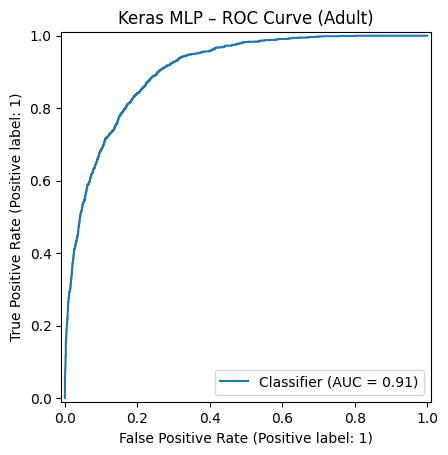

In [ ]:
# Generate an ROC curve for your model.
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_prob)
plt.title("Keras MLP - ROC Curve (Adult)")
plt.show()

